In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import astropy.convolution



In [2]:
x_start = 1700
x_end = 1900

y_start = 1500
y_end = 1700

data = fits.getdata('/Users/nasserm/Documents/vscode/lsstda/waldointhesky/sim_image_pre_waldo.fits')


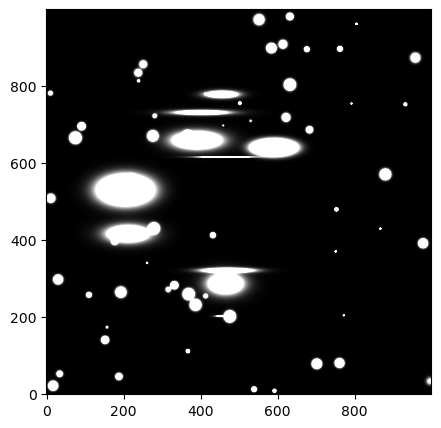

In [3]:
plt.figure(figsize=(5,5))
vmin, vmax = np.percentile(data, [55, 95])
plt.imshow(data, vmin = vmin, vmax = vmax, origin='lower', cmap='gray')

In [4]:
def find_peaks(image, threshold):
    peak_x_values = []
    peak_y_values = []
    for j in range(np.shape(image)[1]):  # x
        for i in range(np.shape(image)[0]):  # y
            try:
                if image[i, j] > threshold:
                    point = image[i, j]
                    north = image[i-1, j]
                    south = image[i+1, j]
                    east = image[i, j+1]
                    west = image[i, j-1]
                    ne = image[i-1, j+1]
                    nw = image[i-1, j-1]
                    se = image[i+1, j+1]
                    sw = image[i+1, j-1]
                    max_ = np.argmax(np.array([point, np.mean([north, south, east, west, ne, nw, se, sw])]))
                    if max_ == 0:
                        peak_x_values.append(j)
                        peak_y_values.append(i)
            except IndexError:
                pass  # skip edges
    return np.array(peak_x_values), np.array(peak_y_values)

In [19]:
from astropy.convolution import convolve, convolve_fft
from astropy.convolution import Gaussian2DKernel

import centroid_tools


peak_x_values, peak_y_values, convolved_image = centroid_tools.convolve_peaks(data, threshold = 14, std=2)

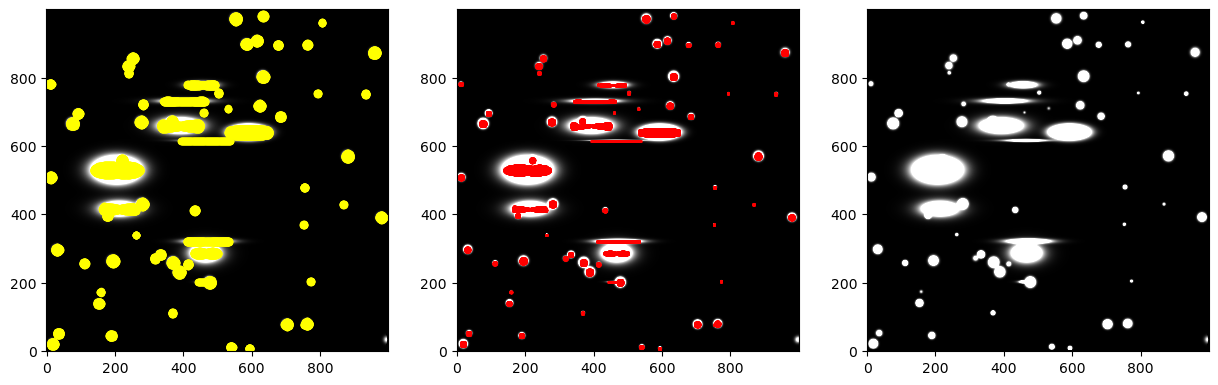

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
vmin, vmax = np.percentile(data, [25, 95])
plt.imshow(convolved_image, vmin = vmin, vmax = vmax, cmap='gray', origin='lower')
plt.scatter(peak_x_values, peak_y_values, s = 20, color = 'yellow')

plt.subplot(1,3,2)
plt.imshow(data, vmin = vmin, vmax = vmax, cmap='gray', origin='lower')
plt.scatter(peak_x_values, peak_y_values, s = 1, color = 'red')

plt.subplot(1,3,3)
plt.imshow(convolved_image, vmin = vmin, vmax = vmax, cmap='gray', origin='lower')

In [89]:
import numpy as np
from sklearn.cluster import KMeans

# your data
points = np.column_stack((peak_x_values, peak_y_values))

k = 50  
kmeans = KMeans(n_clusters=k, random_state=14).fit(points)

centers = kmeans.cluster_centers_

/opt/anaconda3/envs/DSFP/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [90]:
centers.T[1]


array([414.16441006, 639.58482613,  86.70987654, 254.        ,
        45.        , 730.7281106 , 972.        , 529.55361305,
       391.        , 873.        , 570.        , 297.        ,
       842.66763848, 803.        , 674.29447853, 660.69276219,
       287.05034325, 264.        , 775.43347639, 529.1031746 ,
        32.95038168, 653.97953964,  10.8372093 , 508.        ,
       901.72584856, 639.68271335, 681.09090909, 143.76315789,
       718.        , 904.35714286, 303.53      , 277.53529412,
       201.05645161, 430.        , 781.        , 529.23981374,
       691.56363636, 412.73109244, 445.72093023, 412.        ,
       111.        , 980.        , 753.25384615, 320.5708502 ,
       533.83597285,  78.        , 245.        , 638.16885007,
       257.        , 752.        ])

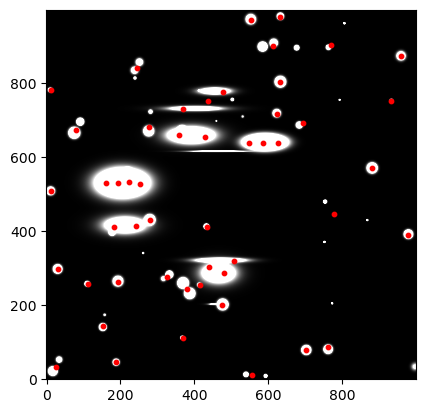

In [91]:
plt.imshow(data, vmin = vmin, vmax = vmax, cmap='gray', origin='lower')
plt.scatter(centers.T[0], centers.T[1], s = 10, color = 'red')

In [ ]:
def average_peaks(peak_x_values, peak_y_values):
    nearest_pixel_x = []
    nearest_pixel_y = []

    distance_value =[]

    lone_pixel_x = [
    ]
    lone_pixel_y = []
    
    peak_positions = np.stack((peak_x_values, peak_y_values), axis=-1)
    for pos in peak_positions:
        distances = np.sqrt(np.sum((peak_positions - pos) ** 2, axis=1))
        nearest_index = np.argsort(distances)[1]  # Skip the first (self)
        nearest_pixel_x.append(peak_x_values[nearest_index])
        nearest_pixel_y.append(peak_y_values[nearest_index])
        distance_value.append(distances[nearest_index])
        if (distances[nearest_index]) > 3:
            lone_pixel_x.append(peak_positions[0])
            lone_pixel_y.append(peak_positions[1])

    
    return np.array(nearest_pixel_x), np.array(nearest_pixel_y), lone_pixel_x, lone_pixel_y, distance_value



In [ ]:
peak_positions = np.stack((peak_x_values, peak_y_values), axis=-1)
distances=np.sqrt(np.sum((peak_positions - peak_positions[20]) ** 2, axis=1))
distances

0.0

In [71]:
nearest_index = np.argsort(distances)
for k in distances[nearest_index]:
    print(k)

0.0
1.0
1.0
1.4142135623730951
2.0
2.0
2.23606797749979
2.23606797749979
2.23606797749979
2.23606797749979
2.8284271247461903
3.0
3.0
3.1622776601683795
3.1622776601683795
3.1622776601683795
3.1622776601683795
3.605551275463989
3.605551275463989
4.0
4.0
4.123105625617661
4.123105625617661
4.123105625617661
4.123105625617661
4.242640687119285
4.47213595499958
4.47213595499958
4.47213595499958
4.47213595499958
5.0
5.0
5.0
5.0
5.0990195135927845
5.0990195135927845
5.0990195135927845
5.0990195135927845
5.385164807134504
5.385164807134504
5.385164807134504
5.385164807134504
5.656854249492381
5.830951894845301
5.830951894845301
6.0
6.0
6.082762530298219
6.082762530298219
6.082762530298219
6.082762530298219
6.324555320336759
6.324555320336759
6.324555320336759
6.324555320336759
6.4031242374328485
6.4031242374328485
6.708203932499369
6.708203932499369
7.0
7.0
7.0710678118654755
7.0710678118654755
7.0710678118654755
7.0710678118654755
7.0710678118654755
7.211102550927978
7.211102550927978
7.280

In [55]:
distances

array([  1.        ,   0.        ,   1.        , ..., 988.0713537 ,
       987.952428  , 987.83450031])

In [44]:
xs, xy, lx, ly, d = average_peaks(peak_x_values, peak_y_values)

In [45]:
print(d)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,